# Урок 1B: Pandas + мини-EDA
Датасет: `../data/orders.csv`.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data/orders.csv', parse_dates=['date'])
df.head()


,order_id,date,city,category,price
0,1,2025-01-03,Алматы,Электроника,199900
1,2,2025-01-03,Астана,Одежда,29900
2,3,2025-01-04,Алматы,Одежда,15900
3,4,2025-01-04,Шымкент,Электроника,89900
4,5,2025-01-05,Алматы,Дом,25900


In [8]:
rev_by_day = df.groupby('date', as_index=False)['price'].sum()
rev_by_day


,date,price
0,2025-01-03,229800
1,2025-01-04,105800
2,2025-01-05,155800
3,2025-01-06,73700
4,2025-01-07,25900


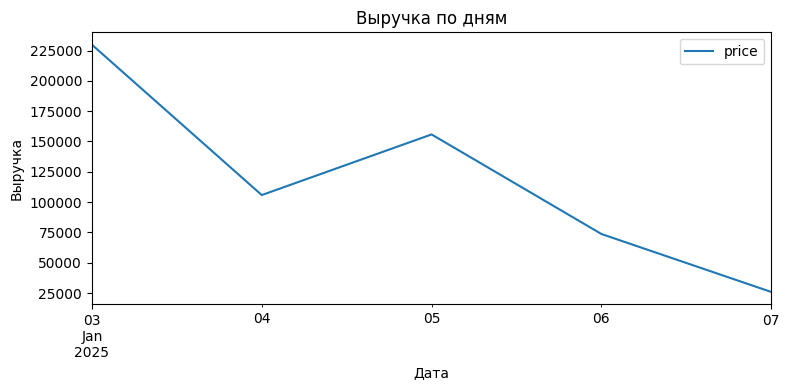

In [9]:
rev_by_day.plot(x='date', y='price', kind='line', figsize=(8,4))
plt.title('Выручка по дням'); plt.xlabel('Дата'); plt.ylabel('Выручка')
plt.tight_layout(); plt.show()


In [10]:
rev_by_cat = df.groupby('category', as_index=False)['price'].sum().sort_values('price', ascending=False)
rev_by_cat


,category,price
2,Электроника,419700
1,Одежда,90600
0,Дом,80700


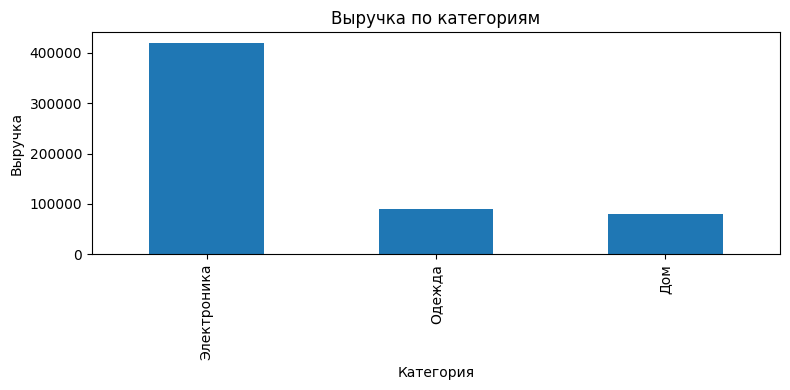

In [11]:
rev_by_cat.plot(x='category', y='price', kind='bar', figsize=(8,4), legend=False)
plt.title('Выручка по категориям'); plt.xlabel('Категория'); plt.ylabel('Выручка')
plt.tight_layout(); plt.show()


In [12]:
rev_by_cat.to_csv('../data/agg_by_category.csv', index=False)
print('Сохранено: data/agg_by_category.csv')


Сохранено: data/agg_by_category.csv


## Выводы
1. ...
2. ...
3. ...


In [13]:
TOP_N = 3  # можно менять
total_rev = rev_by_cat['price'].sum()
topN = (rev_by_cat
        .assign(share_pct=lambda d: d['price'] / total_rev * 100)
        .nlargest(TOP_N, 'price'))
topN


,category,price,share_pct
2,Электроника,419700,71.015228
1,Одежда,90600,15.329949
0,Дом,80700,13.654822


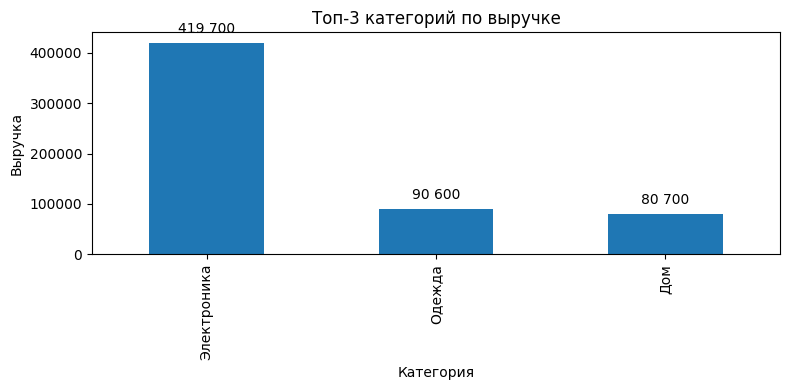

Сохранено: ds-starter/data/top_categories.png


In [14]:
ax = topN.plot(x='category', y='price', kind='bar', figsize=(8,4), legend=False)
ax.set_title(f'Топ-{TOP_N} категорий по выручке')
ax.set_xlabel('Категория'); ax.set_ylabel('Выручка')
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}".replace(',', ' '),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', xytext=(0,5), textcoords='offset points')
import matplotlib.pyplot as plt
plt.tight_layout()
plt.savefig('../data/top_categories.png', dpi=130, bbox_inches='tight')
plt.show()
print('Сохранено: ds-starter/data/top_categories.png')


,date,price
0,2025-01-03,199900
1,2025-01-04,15900
2,2025-01-05,25900
3,2025-01-06,18900


,category,price
2,Электроника,199900
1,Одежда,34800
0,Дом,25900


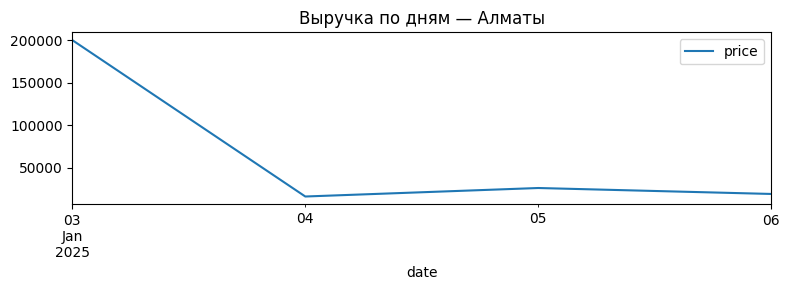

In [15]:
CITY = "Алматы"  # поменяй и перезапусти ячейки ниже
df_city = df.query("city == @CITY")
rev_by_day_city = df_city.groupby('date', as_index=False)['price'].sum()
rev_by_cat_city = df_city.groupby('category', as_index=False)['price'].sum().sort_values('price', ascending=False)

display(rev_by_day_city.head())
display(rev_by_cat_city)

rev_by_day_city.plot(x='date', y='price', kind='line', figsize=(8,3), title=f'Выручка по дням — {CITY}')
plt.tight_layout(); plt.show()


In [16]:
rev_by_cat.to_csv('../data/agg_by_category.csv', index=False)
rev_by_cat_city.to_csv(f'../data/agg_by_category_{CITY}.csv', index=False)
print('Готово: agg_by_category.csv и agg_by_category_Алматы.csv')


Готово: agg_by_category.csv и agg_by_category_Алматы.csv


In [ ]:
agg_cat = (df
           .groupby('category', as_index=False)['price']
           .sum()
           .sort_values('price', ascending=False))

# Сохраним результат в CSV
agg_cat.to_csv('../data/agg_by_category.csv', index=False, encoding='utf-8-sig')
agg_cat


In [ ]:
import matplotlib.pyplot as plt

top_cities = (df.groupby('city', as_index=False)['price']
                .sum()
                .sort_values('price', ascending=False)
                .head(5))

top_cities.to_csv('../data/top_cities.csv', index=False, encoding='utf-8-sig')

ax = top_cities.plot(kind='bar', x='city', y='price', legend=False, figsize=(8,4))
ax.set_title('Топ-5 городов по выручке'); ax.set_xlabel('Город'); ax.set_ylabel('Выручка')
plt.tight_layout()
plt.savefig('../data/top_cities.png', dpi=150)
plt.show()


In [ ]:
plt.savefig('../data/revenue_by_day.png', dpi=150)
